In [1]:
import sys
sys.path.append('/home/sophie/Workspace')
import numpy as np
import matplotlib.pylab as plt
from scipy import stats 
import pandas as pd
from BrainEmbeddingPhase2.B2BNet.leave_one_utility \
    import LeaveOne

experiment_path = 'Samsung_T5/Experiment2019/K-fold_NYU/'

In [2]:
leave_one_test = LeaveOne(experiment_path)

100%|██████████| 216/216 [00:00<00:00, 893.89it/s]


(24, 188) (2, 192)


/home/sophie/Workspace/BrainEmbeddingPhase2/B2BNet/load_group_data.py:109: RuntimeWarning: invalid value encountered in true_divide
  individuals_relative[ta1a3_group[i]] = individuals_norm[ta1a3_group[i]] / norm_ta1a3


In [4]:
prob_take_one_in_a1a3, prob_take_one_in_typical = leave_one_test.leave_one_test(is_log=False)

100%|██████████| 172/172 [04:33<00:00,  1.62s/it]


In [8]:
import pickle
prefix = '/media/sophie/'


with open(prefix+experiment_path+'prob_take_one_in_typical_without_log.txt', "wb") as fp:
    pickle.dump(prob_take_one_in_typical, fp)

with open(prefix+experiment_path+'prob_take_one_in_a1a3_without_log.txt', "wb") as fp:
    pickle.dump(prob_take_one_in_a1a3, fp)    


In [73]:
import pickle
prefix = '/media/sophie/'

infile = open(prefix+experiment_path+'prob_take_one_in_typical_without_log.txt', 'rb')
prob_take_one_in_typical = pickle.load(infile)
infile.close()

infile = open(prefix+experiment_path+'prob_take_one_in_a1a3_without_log.txt', 'rb')
prob_take_one_in_a1a3 = pickle.load(infile)
infile.close()

In [15]:
prob_take_one_universal_in_a1a3=[]


for prob in prob_take_one_in_a1a3:
    prob_take_one_universal_in_a1a3.append(list(prob[0]))
#prob_take_one_universal_in_a1a3 = np.array(prob_take_one_universal_in_a1a3)

print(prob_take_one_universal_in_a1a3)


[[2.2227600806125153e-112, 2.505608701142871e-36, 1.1092070213973104e-50, 1.0427272268625829e-12, 3.108271809279291e-35], [0.0, 7.495641195760272e-47, 3.442761811175949e-272, 9.87344487632489e-25, 3.249638663158027e-99], [0.0, 4.292115138452531e-109, 0.0, 1.0658905674028184e-35, 5.858429423046687e-228], [0.0, 3.4997196528079826e-137, 0.0, 4.216853641538442e-96, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [4.6532199745196984e-20, 1.857305743995538e-18, 9.486117599527461e-39, 4.611510520999904e-13, 9.791792285932647e-13], [3.33450010559348e-100, 6.539886757303602e-16, 1.0346089349563733e-108, 2.063541700816181e-12, 1.6567491360361073e-12], [9.283645315017322e-46, 6.485155421996192e-26, 3.749027996405868e-21, 3.1507218219444074e-17, 3.550728891711329e-24], [0.0, 2.6361622135220552e-80, 1.215206396880639e-74, 3.043867456870074e-39, 4.343821500571415e-81], [2.3075963222132455e-144, 1.0382207155648722e-50, 1.3223428096362765e-57, 6.125807641578283e-29, 3.9930037555634535e-44], [0.0, 2.3975590275271867e

In [29]:
prob_take_one_in_a1a3[22][0]

array([4.04587732e-38, 6.68704336e-32, 2.18809269e-13, 1.20756199e-23])

In [17]:
np.shape(prob_take_one_universal_in_a1a3)

(172,)

In [16]:
prob_take_one_universal_in_typical=[]
for prob in prob_take_one_in_typical:
    prob_take_one_universal_in_typical.append(list(prob[0]))

#prob_take_one_universal_in_typical = np.array(prob_take_one_universal_in_typical)

In [21]:
prob_take_one_universal_in_universal =np.concatenate(
    [prob_take_one_universal_in_a1a3,prob_take_one_universal_in_typical])

In [6]:
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [13]:
prob_take_one_universal_in_a1a3 = pad_sequences(prob_take_one_universal_in_a1a3, padding='post')
prob_take_one_universal_in_typical = pad_sequences(prob_take_one_universal_in_typical, padding='post')

In [14]:
prob_take_one_universal_in_a1a3

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int32)

In [17]:

df_prob_take_one_universal_in_a1a3 = pd.DataFrame(prob_take_one_universal_in_a1a3)
df_prob_take_one_universal_in_typical = pd.DataFrame(prob_take_one_universal_in_typical)



In [20]:
df_prob_take_one_universal_in_universal = pd.concat([df_prob_take_one_universal_in_a1a3,df_prob_take_one_universal_in_typical])

In [21]:
df_prob_take_one_universal_in_universal 

0              1              2              3  \
0    2.222760e-112   2.505609e-36   1.109207e-50   1.042727e-12   
1     0.000000e+00   7.495641e-47  3.442762e-272   9.873445e-25   
2     0.000000e+00  4.292115e-109   0.000000e+00   1.065891e-35   
3     0.000000e+00  3.499720e-137   0.000000e+00   4.216854e-96   
4     0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
..             ...            ...            ...            ...   
167  2.074899e-180   1.138175e-57   6.802941e-31   4.208878e-22   
168   0.000000e+00   0.000000e+00  6.176269e-201  4.392091e-111   
169   2.207107e-12   2.362342e-13   9.954959e-12   7.392377e-17   
170   3.789577e-52   8.879774e-42   1.818390e-29   3.927933e-25   
171   0.000000e+00   0.000000e+00  7.150780e-200  9.254003e-157   

                 4             5  
0     3.108272e-35           NaN  
1     3.249639e-99           NaN  
2    5.858429e-228           NaN  
3     0.000000e+00           NaN  
4     0.000000e+00           NaN  
..             ...           ...  
167   4.424279e-11           NaN  
168  5.766506e-122           NaN  
169   3.568682e-21  7.377507e-19  
170   5.712312e-11           NaN  
171  1.405198e-146           NaN  

[344 rows x 6 columns]

In [22]:
prefix = '/media/sophie/'
with pd.ExcelWriter(prefix+experiment_path+"leave_one_prob_without_log.xlsx") as writer:  # doctest: +SKIP
    df_prob_take_one_universal_in_a1a3.to_excel(writer, sheet_name='prob_take_one_universal_in_a1a3') 
    df_prob_take_one_universal_in_typical.to_excel(writer, sheet_name='prob_take_one_universal_in_typical') 


/home/sophie/anaconda3/envs/python3voxel/lib/python3.6/site-packages/openpyxl/workbook/child.py:102: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [5]:
#############TODO#########################

to_typical_max, to_a1a3_max =  leave_one_test.get_max_prob(
    prob_a1a3_in_a1a3, prob_a1a3_in_typical, prob_typical_in_a1a3, prob_typical_in_typical)

NameError: name 'prob_a1a3_in_a1a3' is not defined

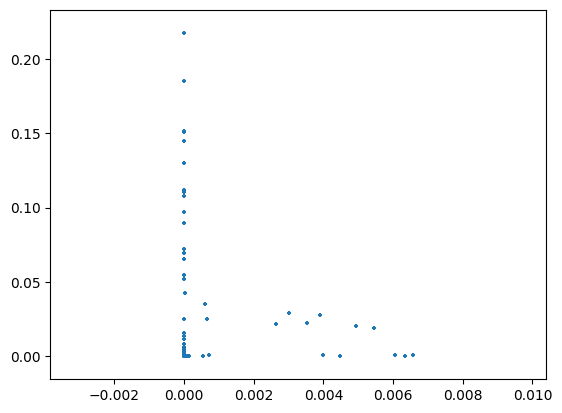

In [15]:

plt.scatter(to_typical_max[:84]*100000000, to_a1a3_max[:84]*100000000, marker = '+', s= 10 )


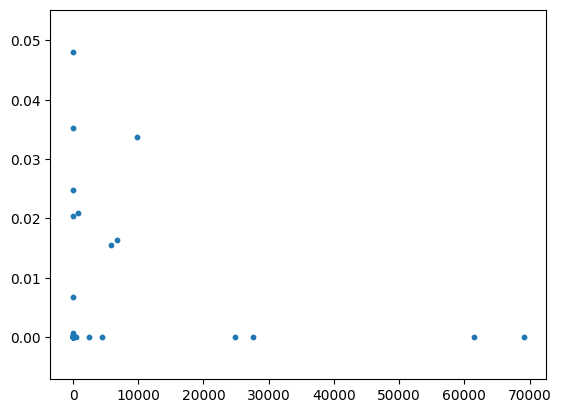

In [17]:
plt.scatter(to_typical_max[84:]*100000000, to_a1a3_max[84:]*100000000, marker = 'o', s= 10 )
plt.show()

In [74]:
# from sklearn.preprocessing import normalize
enlarge = 10e14
for i in range(len(prob_take_one_in_a1a3)):
#     sum_this_prob= np.sum(prob_take_one_in_a1a3[i]) + np.sum(prob_take_one_in_typical[i])
#     if sum_this_prob > 0:
#         prob_take_one_in_a1a3[i] = prob_take_one_in_a1a3[i] / sum_this_prob
#         prob_take_one_in_typical[i] = prob_take_one_in_typical[i] / sum_this_prob
        prob_take_one_in_a1a3[i] = prob_take_one_in_a1a3[i] * enlarge
        prob_take_one_in_typical[i] = prob_take_one_in_typical[i] *enlarge
    

In [75]:
to_a1a3_sort, to_typical_sort = leave_one_test.get_sort_leave_one_prob(prob_take_one_in_a1a3, prob_take_one_in_typical)

In [76]:

result = leave_one_test.leave_one_regression_sort( to_typical_sort, to_a1a3_sort, train_type="leave one")

100%|██████████| 172/172 [00:01<00:00, 92.81it/s]


In [77]:
print(result)

{'mean_score': 0.517577859377125, 'accurate_count': 88, 'f1_score': 0.36363636363636365, 'predict_y': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0.])}


In [3]:
prob_take_one_in_a1a3, prob_take_one_in_typical = leave_one_test.leave_one_test(is_log=False, is_gauss=False)

100%|██████████| 172/172 [04:26<00:00,  1.58s/it]


In [4]:
import pickle
prefix = '/media/sophie/'


with open(prefix+experiment_path+'prob_take_one_inT_wolog_log_norm.txt', "wb") as fp:
    pickle.dump(prob_take_one_in_typical, fp)

with open(prefix+experiment_path+'prob_take_one_inA_wolog_log_norm.txt', "wb") as fp:
    pickle.dump(prob_take_one_in_a1a3, fp)  

In [25]:
import pickle
prefix = '/media/sophie/'

infile = open(prefix+experiment_path+'prob_take_one_inT_wolog_log_norm.txt', 'rb')
prob_take_one_in_typical = pickle.load(infile)
infile.close()

infile = open(prefix+experiment_path+'prob_take_one_inA_wolog_log_norm.txt', 'rb')
prob_take_one_in_a1a3 = pickle.load(infile)
infile.close()

In [26]:
# from sklearn.preprocessing import normalize
enlarge = 10e18
for i in range(len(prob_take_one_in_a1a3)):
#     sum_this_prob= np.sum(prob_take_one_in_a1a3[i]) + np.sum(prob_take_one_in_typical[i])
#     if sum_this_prob > 0:
#         prob_take_one_in_a1a3[i] = prob_take_one_in_a1a3[i] / sum_this_prob
#         prob_take_one_in_typical[i] = prob_take_one_in_typical[i] / sum_this_prob
        prob_take_one_in_a1a3[i] = prob_take_one_in_a1a3[i] * enlarge
        prob_take_one_in_typical[i] = prob_take_one_in_typical[i] *enlarge

In [27]:
to_a1a3_sort, to_typical_sort = leave_one_test.get_sort_leave_one_prob(prob_take_one_in_a1a3, prob_take_one_in_typical)

In [28]:
result = leave_one_test.leave_one_regression_sort( to_typical_sort, to_a1a3_sort, train_type="leave one")

100%|██████████| 172/172 [00:00<00:00, 206.50it/s]


In [29]:
print(result)

{'mean_score': 0.48803209574323403, 'accurate_count': 21, 'f1_score': 0.12716763005780346, 'predict_y': array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0.])}
